### This is a binary classification project i.e we will predict if the object is rock or mine
- We will use `logistic regression` as it works really well with binary classification.
- `logistic regression` == `supervised learning algorithm`

# Importing data and dependencies

In [64]:
import pandas as pd
import seaborn as sns
import numpy as np

In [65]:
df=pd.read_csv('sonar.csv', header=None) #In this data there is no header file i.e directly values of data are stored so we need to specify there is no header in the dataset

# Checking how data looks like: Asking basic queries

In [66]:
df.shape

(208, 61)

In [67]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [68]:
df.sample(6)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
38,0.0123,0.0022,0.0196,0.0206,0.0180,0.0492,0.0033,0.0398,0.0791,0.0475,...,0.0125,0.0134,0.0026,0.0038,0.0018,0.0113,0.0058,0.0047,0.0071,R
83,0.0217,0.0340,0.0392,0.0236,0.1081,0.1164,0.1398,0.1009,0.1147,0.1777,...,0.0031,0.0103,0.0078,0.0077,0.0094,0.0031,0.0030,0.0013,0.0069,R
48,0.0190,0.0038,0.0642,0.0452,0.0333,0.0690,0.0901,0.1454,0.0740,0.0349,...,0.0093,0.0118,0.0112,0.0094,0.0140,0.0072,0.0022,0.0055,0.0122,R
193,0.0203,0.0121,0.0380,0.0128,0.0537,0.0874,0.1021,0.0852,0.1136,0.1747,...,0.0134,0.0094,0.0047,0.0045,0.0042,0.0028,0.0036,0.0013,0.0016,M
47,0.0373,0.0281,0.0232,0.0225,0.0179,0.0733,0.0841,0.1031,0.0993,0.0802,...,0.0008,0.0045,0.0024,0.0006,0.0073,0.0096,0.0054,0.0085,0.0060,R
10,0.0039,0.0063,0.0152,0.0336,0.0310,0.0284,0.0396,0.0272,0.0323,0.0452,...,0.0062,0.0120,0.0052,0.0056,0.0093,0.0042,0.0003,0.0053,0.0036,R


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [70]:
df.describe() 

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [71]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

<Axes: >

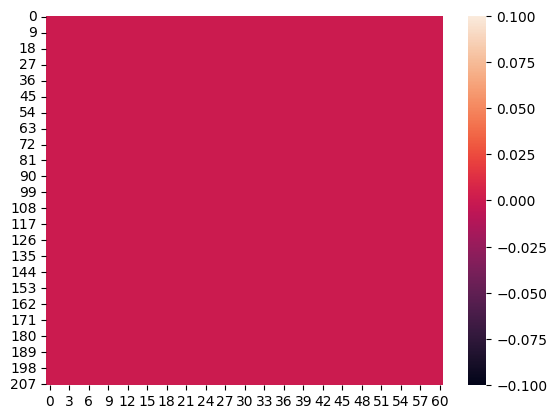

In [72]:
sns.heatmap(df.isnull())

In [73]:
df.duplicated().sum()

np.int64(0)

In [74]:
ndf=df.select_dtypes(include='number')
ndf.corr()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.735896,0.571537,0.491438,0.344797,0.238921,0.260815,0.355523,0.353420,0.318276,...,0.254450,0.355299,0.311729,0.322299,0.312067,0.220642,0.313725,0.368132,0.357116,0.347078
1,0.735896,1.000000,0.779916,0.606684,0.419669,0.332329,0.279040,0.334615,0.316733,0.270782,...,0.320538,0.434548,0.346076,0.383960,0.380165,0.262263,0.280341,0.353042,0.352200,0.358761
2,0.571537,0.779916,1.000000,0.781786,0.546141,0.346275,0.190434,0.237884,0.252691,0.219637,...,0.238110,0.394076,0.332914,0.367186,0.289731,0.287661,0.380819,0.334108,0.425047,0.373948
3,0.491438,0.606684,0.781786,1.000000,0.726943,0.352805,0.246440,0.246742,0.247078,0.237769,...,0.174676,0.374651,0.364772,0.334211,0.284955,0.280938,0.340254,0.344865,0.420266,0.400626
4,0.344797,0.419669,0.546141,0.726943,1.000000,0.597053,0.335422,0.204006,0.177906,0.183219,...,0.115936,0.266617,0.314985,0.205306,0.196472,0.199323,0.219395,0.238793,0.290982,0.253710
5,0.238921,0.332329,0.346275,0.352805,0.597053,1.000000,0.702889,0.471683,0.327578,0.288621,...,0.171767,0.252288,0.162404,0.164073,0.133464,0.166758,0.161333,0.203986,0.220573,0.178158
6,0.260815,0.279040,0.190434,0.246440,0.335422,0.702889,1.000000,0.675774,0.470580,0.425448,...,0.184152,0.144051,0.046403,0.163074,0.195541,0.174143,0.186324,0.242646,0.183578,0.222493
7,0.355523,0.334615,0.237884,0.246742,0.204006,0.471683,0.675774,1.000000,0.778577,0.652525,...,0.260692,0.219038,0.102447,0.234008,0.239551,0.276819,0.267212,0.287603,0.194400,0.146216
8,0.353420,0.316733,0.252691,0.247078,0.177906,0.327578,0.470580,0.778577,1.000000,0.877131,...,0.174873,0.207996,0.105352,0.202615,0.179342,0.232764,0.193963,0.231745,0.097293,0.095243
9,0.318276,0.270782,0.219637,0.237769,0.183219,0.288621,0.425448,0.652525,0.877131,1.000000,...,0.167096,0.165537,0.097544,0.146725,0.175254,0.151889,0.140327,0.212277,0.058273,0.097358


In [75]:
df[60].value_counts() #Checking how many datas are M='Mines' and R='Rocks'
#It is checked on 60th column which is the target column

60
M    111
R     97
Name: count, dtype: int64

In [76]:
df.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


# EDA

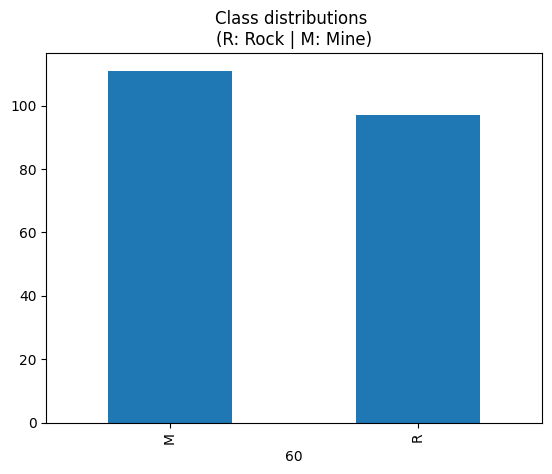

In [77]:
plot = df[60].value_counts().plot(kind='bar', title="Class distributions \n(R: Rock | M: Mine)")
fig = plot.get_figure()

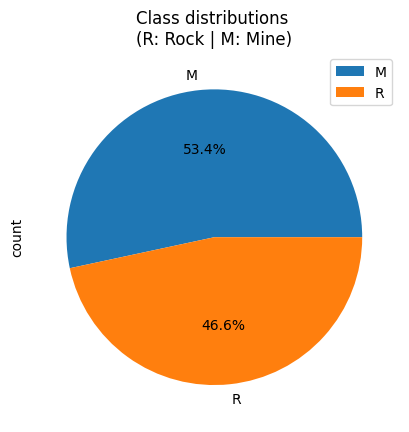

In [78]:
plot = df[60].value_counts().plot(kind='pie', autopct='%.1f%%', title="Class distributions \n(R: Rock | M: Mine)", legend=True)
fig = plot.get_figure()

# Separating Predictors and Target

In [79]:
X=df.drop([60],axis=1)
X

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [80]:
y=df[60]
y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

# Spliting the data

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)  #Stratigy divides the data of R and M in equal parts

In [102]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
97,0.0491,0.0279,0.0592,0.1270,0.1772,0.1908,0.2217,0.0768,0.1246,0.2028,...,0.0268,0.0081,0.0129,0.0161,0.0063,0.0119,0.0194,0.0140,0.0332,0.0439
132,0.0968,0.0821,0.0629,0.0608,0.0617,0.1207,0.0944,0.4223,0.5744,0.5025,...,0.0206,0.0073,0.0081,0.0303,0.0190,0.0212,0.0126,0.0201,0.0210,0.0041
201,0.0335,0.0258,0.0398,0.0570,0.0529,0.1091,0.1709,0.1684,0.1865,0.2660,...,0.0130,0.0120,0.0039,0.0053,0.0062,0.0046,0.0045,0.0022,0.0005,0.0031
54,0.0132,0.0080,0.0188,0.0141,0.0436,0.0668,0.0609,0.0131,0.0899,0.0922,...,0.0136,0.0044,0.0028,0.0021,0.0022,0.0048,0.0138,0.0140,0.0028,0.0064
105,0.0116,0.0179,0.0449,0.1096,0.1913,0.0924,0.0761,0.1092,0.0757,0.1006,...,0.0031,0.0163,0.0099,0.0084,0.0270,0.0277,0.0097,0.0054,0.0148,0.0092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,0.0093,0.0185,0.0056,0.0064,0.0260,0.0458,0.0470,0.0057,0.0425,0.0640,...,0.0022,0.0069,0.0064,0.0129,0.0114,0.0054,0.0089,0.0050,0.0058,0.0025
116,0.0094,0.0333,0.0306,0.0376,0.1296,0.1795,0.1909,0.1692,0.1870,0.1725,...,0.0216,0.0153,0.0112,0.0241,0.0164,0.0055,0.0078,0.0055,0.0091,0.0067
87,0.0856,0.0454,0.0382,0.0203,0.0385,0.0534,0.2140,0.3110,0.2837,0.2751,...,0.0128,0.0172,0.0138,0.0079,0.0037,0.0051,0.0258,0.0102,0.0037,0.0037
78,0.0231,0.0351,0.0030,0.0304,0.0339,0.0860,0.1738,0.1351,0.1063,0.0347,...,0.0154,0.0106,0.0097,0.0022,0.0052,0.0072,0.0056,0.0038,0.0043,0.0030


In [103]:
y_train

97     M
132    M
201    M
54     R
105    M
      ..
41     R
116    M
87     R
78     R
69     R
Name: 60, Length: 166, dtype: object

In [104]:
y_train.value_counts()

60
M    89
R    77
Name: count, dtype: int64

In [105]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
96,0.0181,0.0146,0.0026,0.0141,0.0421,0.0473,0.0361,0.0741,0.1398,0.1045,...,0.0076,0.0223,0.0255,0.0145,0.0233,0.0041,0.0018,0.0048,0.0089,0.0085
22,0.0099,0.0484,0.0299,0.0297,0.0652,0.1077,0.2363,0.2385,0.0075,0.1882,...,0.0396,0.0173,0.0149,0.0115,0.0202,0.0139,0.0029,0.0160,0.0106,0.0134
6,0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0195,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103
148,0.0712,0.0901,0.1276,0.1497,0.1284,0.1165,0.1285,0.1684,0.1830,0.2127,...,0.0154,0.0154,0.0156,0.0054,0.0030,0.0048,0.0087,0.0101,0.0095,0.0068
194,0.0392,0.0108,0.0267,0.0257,0.0410,0.0491,0.1053,0.1690,0.2105,0.2471,...,0.0089,0.0083,0.0080,0.0026,0.0079,0.0042,0.0071,0.0044,0.0022,0.0014
184,0.0269,0.0383,0.0505,0.0707,0.1313,0.2103,0.2263,0.2524,0.3595,0.5915,...,0.0346,0.0167,0.0199,0.0145,0.0081,0.0045,0.0043,0.0027,0.0055,0.0057
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
77,0.0336,0.0294,0.0476,0.0539,0.0794,0.0804,0.1136,0.1228,0.1235,0.0842,...,0.0033,0.0150,0.0111,0.0032,0.0035,0.0169,0.0137,0.0015,0.0069,0.0051
98,0.1313,0.2339,0.3059,0.4264,0.4010,0.1791,0.1853,0.0055,0.1929,0.2231,...,0.0156,0.0362,0.0210,0.0154,0.0180,0.0013,0.0106,0.0127,0.0178,0.0231
99,0.0201,0.0423,0.0554,0.0783,0.0620,0.0871,0.1201,0.2707,0.1206,0.0279,...,0.0081,0.0191,0.0182,0.0160,0.0290,0.0090,0.0242,0.0224,0.0190,0.0096


# Training the model

In [109]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()

model.fit(X_train,y_train)

LogisticRegression()

# Prediction 

In [112]:
y_pred=model.predict(X_test)
y_pred

array(['R', 'M', 'R', 'M', 'M', 'M', 'M', 'R', 'M', 'R', 'R', 'M', 'R',
       'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'R', 'R', 'R',
       'R', 'M', 'M', 'R', 'M', 'M', 'R', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'R'], dtype=object)

In [113]:
y_test

96     R
22     R
6      R
148    M
194    M
184    M
203    M
77     R
98     M
99     M
72     R
179    M
32     R
61     R
27     R
40     R
149    M
171    M
33     R
118    M
196    M
4      R
168    M
34     R
36     R
64     R
46     R
111    M
199    M
11     R
47     R
126    M
43     R
117    M
2      R
183    M
207    M
157    M
120    M
134    M
189    M
71     R
Name: 60, dtype: object